In [91]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [99]:
def transform_month_column(df, column_name):
    """
    Transforms a column with French month-year format (e.g., "janvier 2012")
    into a standard date format (e.g., "01/01/2012").
    """
    try:
        month_map = {
            "janvier": "01", "février": "02", "mars": "03", "avril": "04", "mai": "05",
            "juin": "06", "juillet": "07", "août": "08", "septembre": "09",
            "octobre": "10", "novembre": "11", "décembre": "12"
        }
        df['Month'] = df[column_name].apply(
            lambda x: pd.to_datetime(f"01/{month_map[x.split()[0].lower()]}/{x.split()[1]}", format="%d/%m/%Y")
        )
    except Exception as e:
        print(f"An error occurred while transforming the column: {e}")

In [100]:
def plot_line_chart(file_name):

    df = pd.read_excel('data/{}.xlsx'.format(file_name))
    df.columns = df.columns.str.strip()
    transform_month_column(df,'Mois de Period End')
    folder_path = 'visualization_{}'.format(file_name)
    os.makedirs(folder_path, exist_ok=True)  
    
    try:
        plt.figure(figsize=(12, 6))
            
        for column in df.columns:
            if column not in ['Region', 'Mois de Period End']:
                plt.figure(figsize=(10, 5))
                plt.plot(df.Month, df[column], label=column, linewidth=2, color='blue')
                plt.title(f"{column} Over Time", fontsize=16)
                plt.xlabel("Date", fontsize=14)
                plt.ylabel("Value", fontsize=14)
                plt.grid(alpha=0.5)
                plt.tight_layout()
                file_path = os.path.join(folder_path, f"{column.replace(' ', '_')}_over_time.pdf")
                plt.savefig(file_path)
                plt.show()
                plt.close()

                print(f"Saved plot for {column} to {file_path}")

    except FileNotFoundError:
        print(f"The file {csv_file} was not found.")
    except Exception as e:
        print(f"An error occurred while plotting: {e}")

<Figure size 1200x600 with 0 Axes>

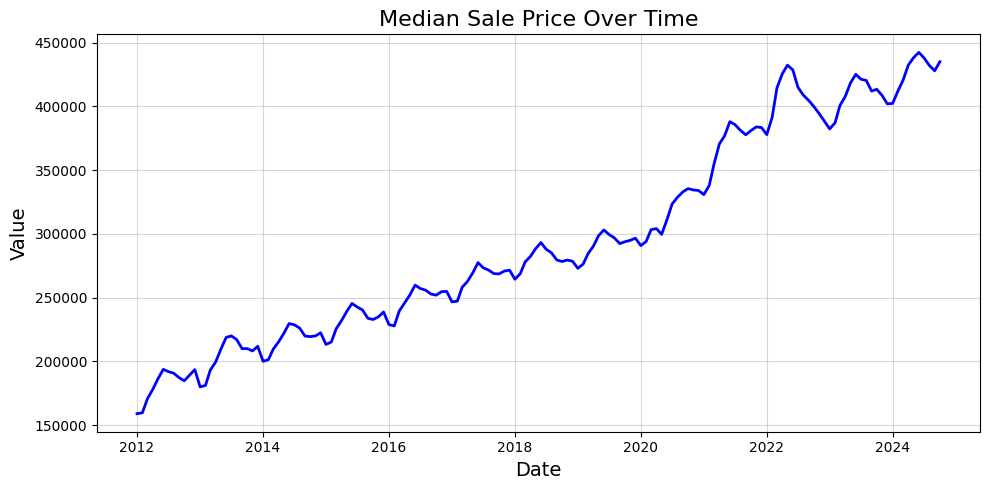

Saved plot for Median Sale Price to visualization_data_national/Median_Sale_Price_over_time.pdf


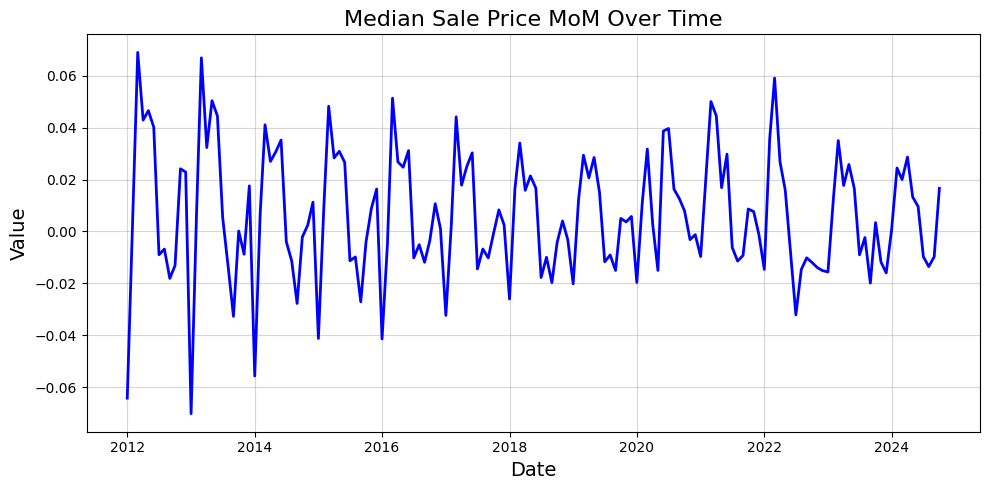

Saved plot for Median Sale Price MoM to visualization_data_national/Median_Sale_Price_MoM_over_time.pdf


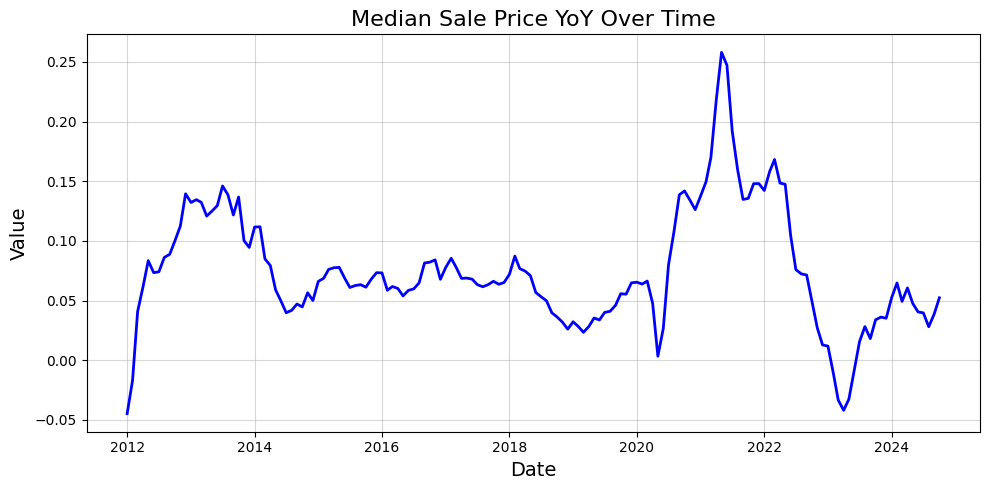

Saved plot for Median Sale Price YoY to visualization_data_national/Median_Sale_Price_YoY_over_time.pdf


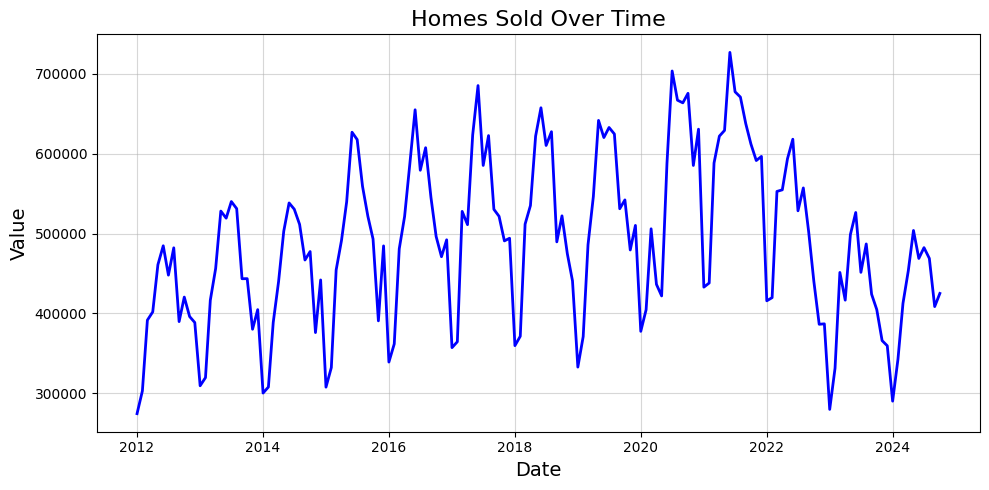

Saved plot for Homes Sold to visualization_data_national/Homes_Sold_over_time.pdf


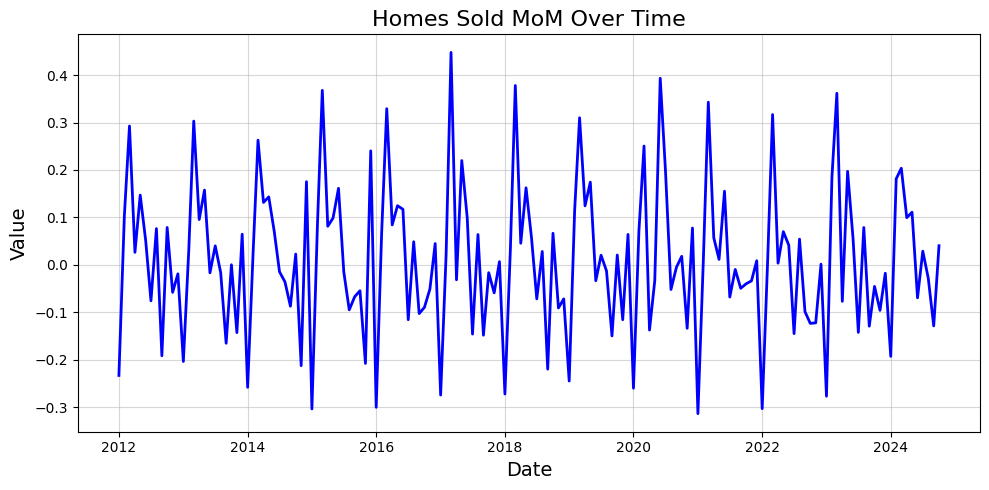

Saved plot for Homes Sold MoM to visualization_data_national/Homes_Sold_MoM_over_time.pdf


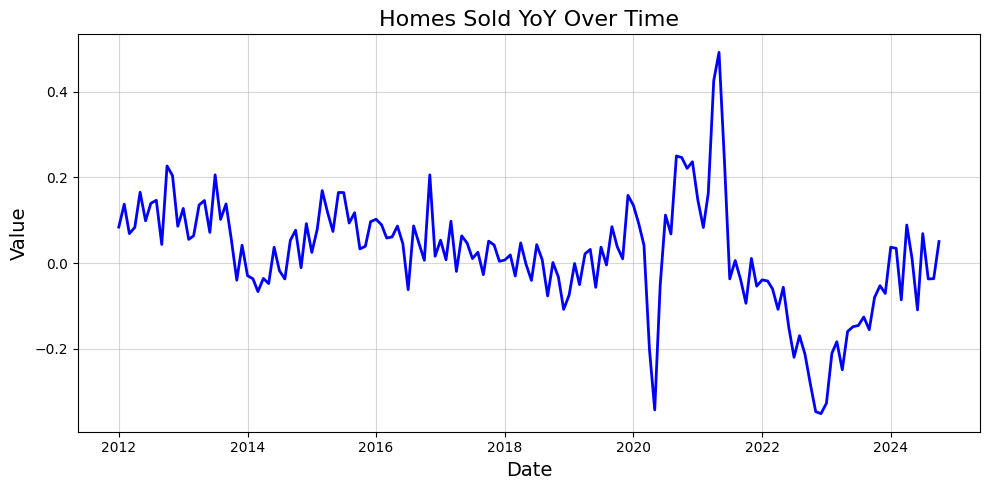

Saved plot for Homes Sold YoY to visualization_data_national/Homes_Sold_YoY_over_time.pdf


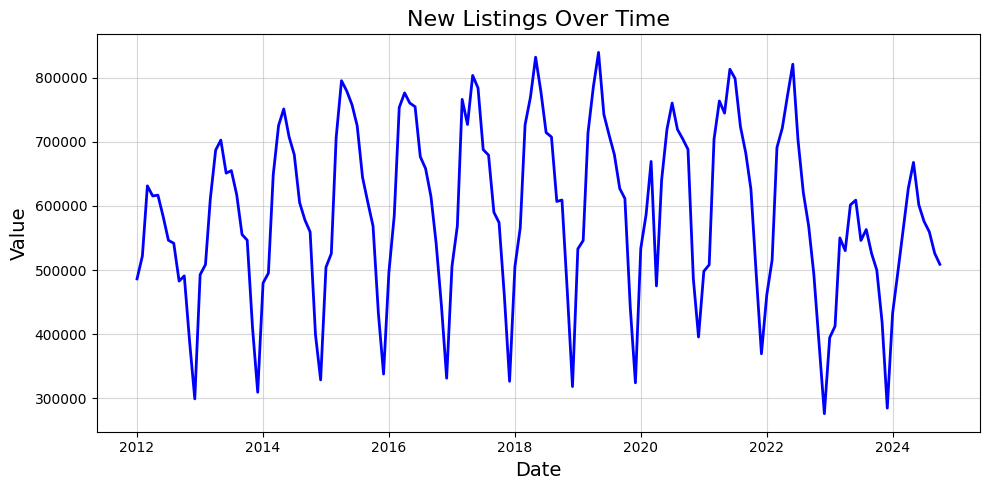

Saved plot for New Listings to visualization_data_national/New_Listings_over_time.pdf


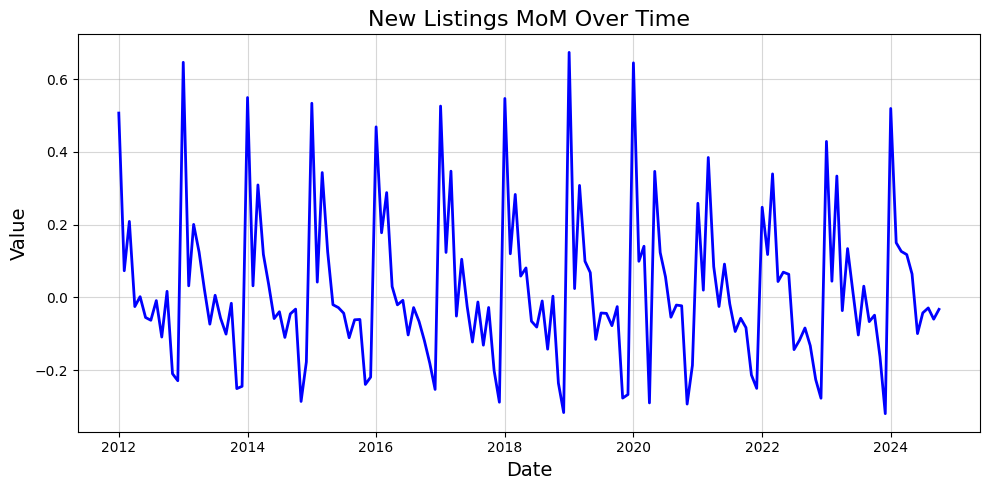

Saved plot for New Listings MoM to visualization_data_national/New_Listings_MoM_over_time.pdf


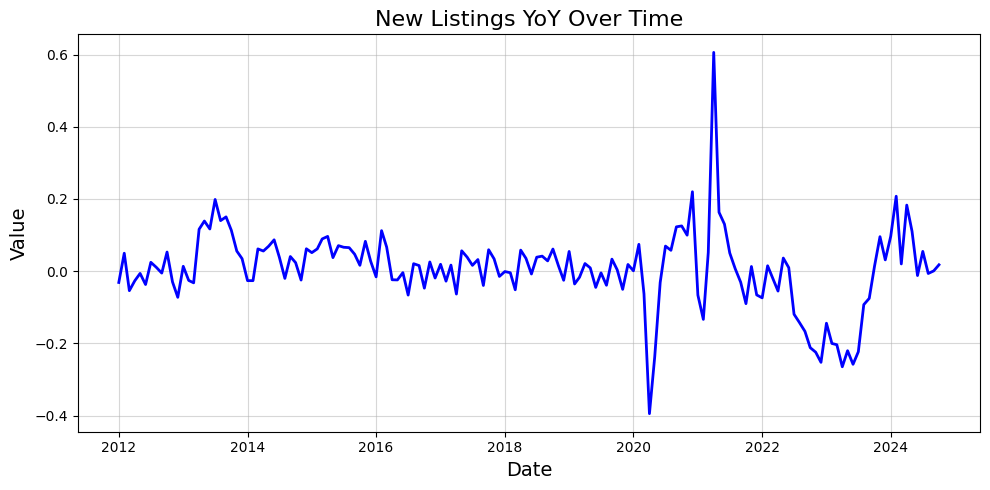

Saved plot for New Listings YoY to visualization_data_national/New_Listings_YoY_over_time.pdf


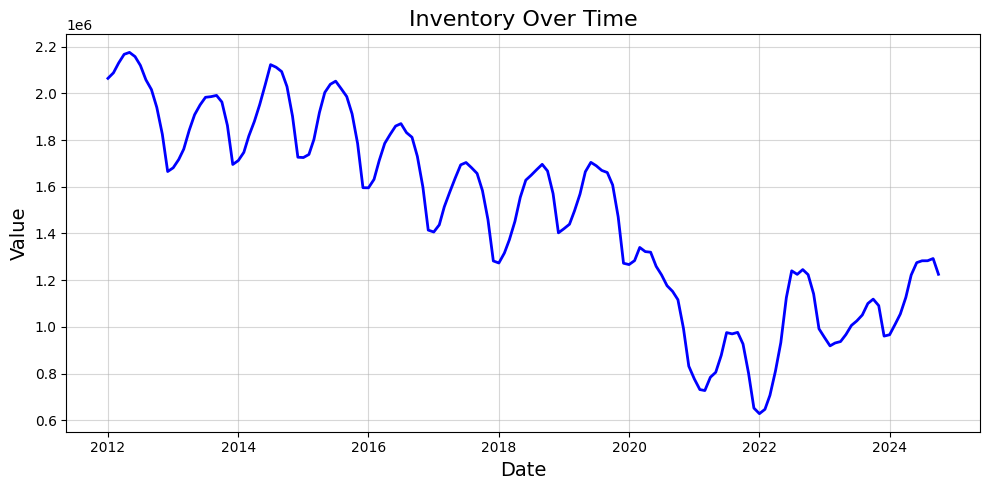

Saved plot for Inventory to visualization_data_national/Inventory_over_time.pdf


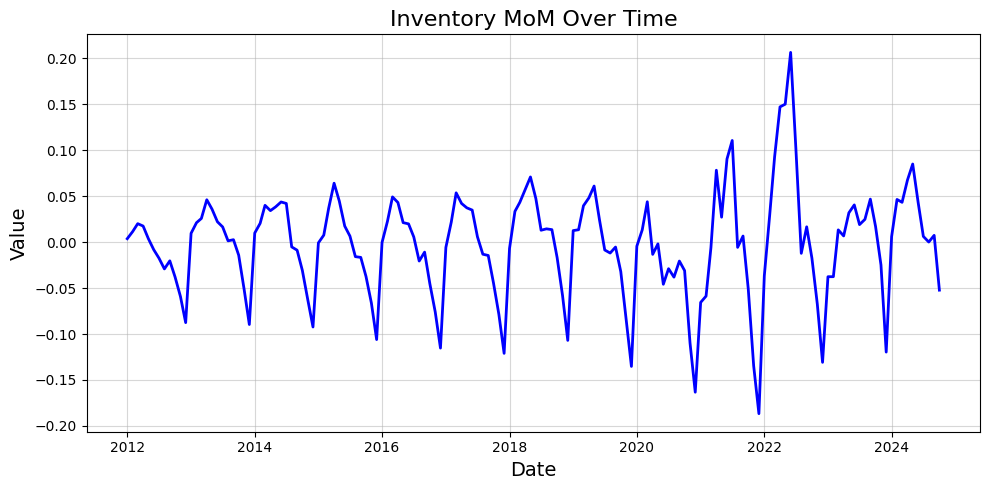

Saved plot for Inventory MoM to visualization_data_national/Inventory_MoM_over_time.pdf


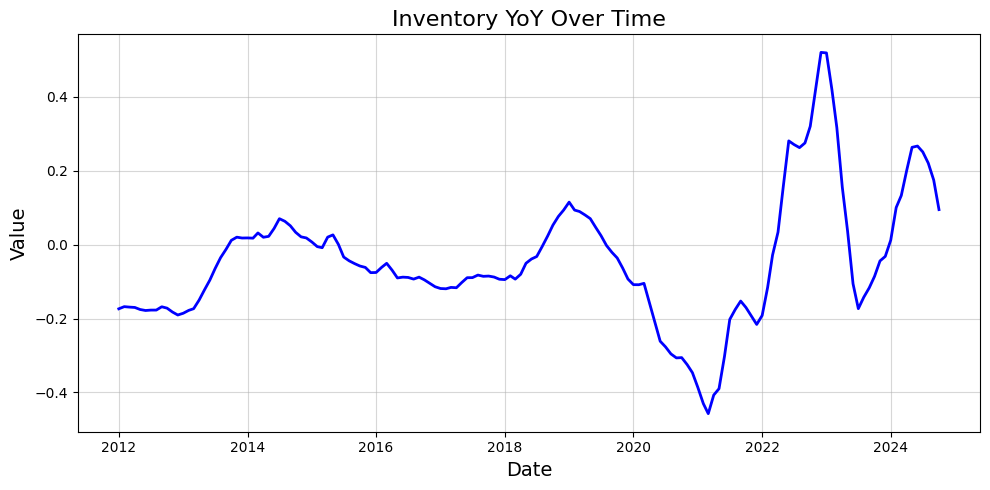

Saved plot for Inventory YoY to visualization_data_national/Inventory_YoY_over_time.pdf


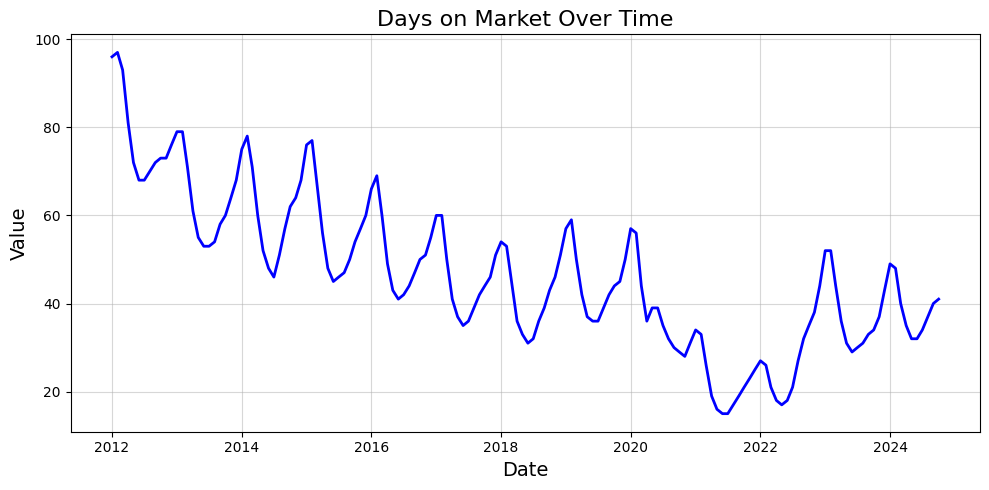

Saved plot for Days on Market to visualization_data_national/Days_on_Market_over_time.pdf


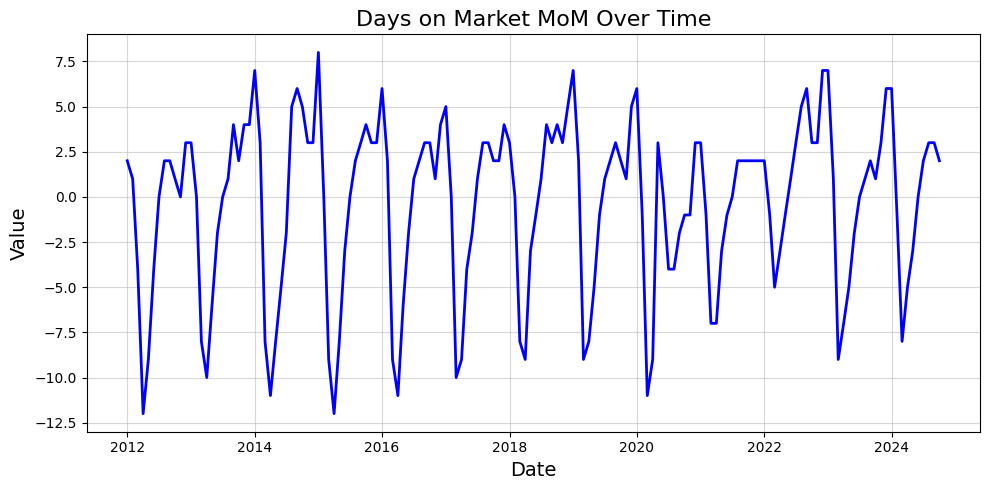

Saved plot for Days on Market MoM to visualization_data_national/Days_on_Market_MoM_over_time.pdf


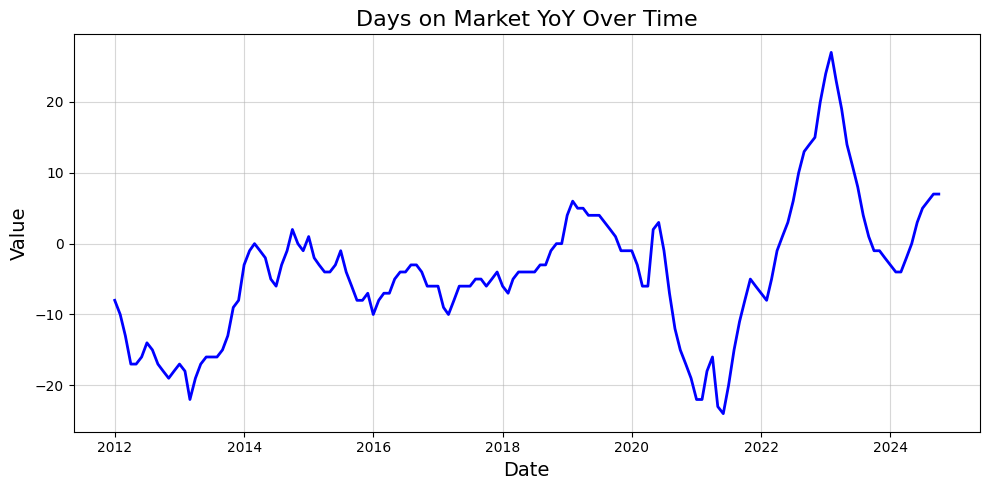

In [ ]:
plot_line_chart('data_national')
plot_line_chart('data_atlanta')
plot_line_chart('data_chicago')